In [1]:
%matplotlib inline
import glob
import json
import os

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
import matplotlib.pyplot as plt

from IPython.display import display as d

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating
2,1,116,./stimuli/own/p25.png,range_image_appeal,3,2023-02-13 15:30:07 575841,True
3,1,116,./stimuli/own/p25.png,range_image_quality,3,2023-02-13 15:30:07 575841,True
10,1,85,./stimuli/midjourney/p05.png,range_image_appeal,2,2023-02-13 15:30:18 311419,True
11,1,85,./stimuli/midjourney/p05.png,range_image_quality,4,2023-02-13 15:30:18 311419,True
18,1,52,./stimuli/dall-e/p26.png,range_image_appeal,1,2023-02-13 15:30:25 821821,True
...,...,...,...,...,...,...,...
29480,62,97,./stimuli/midjourney/p17.png,range_image_quality,2,2023-02-16 09:24:18 833662,True
29487,62,107,./stimuli/midjourney/p27.png,range_image_appeal,3,2023-02-16 09:24:22 635474,True
29488,62,107,./stimuli/midjourney/p27.png,range_image_quality,2,2023-02-16 09:24:22 635474,True
29495,62,57,./stimuli/glide/p04.png,range_image_appeal,1,2023-02-16 09:24:25 267388,True


estimated valid users: 25


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
2,1,116,./stimuli/own/p25.png,range_image_appeal,3,2023-02-13 15:30:07 575841,True,True,own,own/p25
3,1,116,./stimuli/own/p25.png,range_image_quality,3,2023-02-13 15:30:07 575841,True,True,own,own/p25
10,1,85,./stimuli/midjourney/p05.png,range_image_appeal,2,2023-02-13 15:30:18 311419,True,True,midjourney,midjourney/p05
11,1,85,./stimuli/midjourney/p05.png,range_image_quality,4,2023-02-13 15:30:18 311419,True,True,midjourney,midjourney/p05
18,1,52,./stimuli/dall-e/p26.png,range_image_appeal,1,2023-02-13 15:30:25 821821,True,True,dall-e,dall-e/p26
...,...,...,...,...,...,...,...,...,...,...
29480,62,97,./stimuli/midjourney/p17.png,range_image_quality,2,2023-02-16 09:24:18 833662,True,True,midjourney,midjourney/p17
29487,62,107,./stimuli/midjourney/p27.png,range_image_appeal,3,2023-02-16 09:24:22 635474,True,True,midjourney,midjourney/p27
29488,62,107,./stimuli/midjourney/p27.png,range_image_quality,2,2023-02-16 09:24:22 635474,True,True,midjourney,midjourney/p27
29495,62,57,./stimuli/glide/p04.png,range_image_appeal,1,2023-02-16 09:24:25 267388,True,True,glide,glide/p04


{'range_image_quality', 'range_image_appeal'}


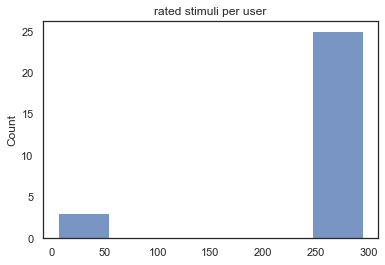

In [2]:
dr = pd.read_csv("subjective/2023_02_17/_ratings.csv")

dr = dr[dr["rating"] != -1]
dr["is_rating"] = dr["rating_type"].apply(
    lambda x: 
        x in ["range_image_appeal", "range_image_quality"]
)
dr = dr[dr["is_rating"]]
d(dr)

dc = dr.groupby(by="user_ID").count().reset_index()

ax = sns.histplot(dc["stimuli_ID"].values)
ax.set_title("rated stimuli per user")

valid_users = set(dc[dc["stimuli_ID"] > 100]["user_ID"].values)
print(f"estimated valid users: {len(valid_users)}")

dr["valid_user"] = dr["user_ID"].apply(
    lambda x:
        x in valid_users
)
dr = dr[dr["valid_user"]]

dr["db"] = dr["stimuli_file"].apply(
    lambda x:
        x.split("/")[2]
)
dr["rating"] = dr["rating"].apply(lambda x: int(x))
dr["image_key"] = dr["stimuli_file"].apply(
    lambda x:
        "/".join(os.path.splitext(x)[0].split("/")[2:])
)
d(dr)
print(set(dr["rating_type"].values))
# so we have only valid users now..

In [3]:
dappeal = dr[dr["rating_type"] == "range_image_appeal"]
d(dappeal)

dquality = dr[dr["rating_type"] == "range_image_quality"]
d(dquality)


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
2,1,116,./stimuli/own/p25.png,range_image_appeal,3,2023-02-13 15:30:07 575841,True,True,own,own/p25
10,1,85,./stimuli/midjourney/p05.png,range_image_appeal,2,2023-02-13 15:30:18 311419,True,True,midjourney,midjourney/p05
18,1,52,./stimuli/dall-e/p26.png,range_image_appeal,1,2023-02-13 15:30:25 821821,True,True,dall-e,dall-e/p26
26,1,81,./stimuli/midjourney/p01.png,range_image_appeal,4,2023-02-13 15:30:35 101121,True,True,midjourney,midjourney/p01
34,1,42,./stimuli/dall-e/p16.png,range_image_appeal,4,2023-02-13 15:30:44 064676,True,True,dall-e,dall-e/p16
...,...,...,...,...,...,...,...,...,...,...
29463,62,3,./stimuli/craiyon/p04.png,range_image_appeal,2,2023-02-16 09:24:10 411412,True,True,craiyon,craiyon/p04
29471,62,108,./stimuli/own/p17.png,range_image_appeal,2,2023-02-16 09:24:14 860524,True,True,own,own/p17
29479,62,97,./stimuli/midjourney/p17.png,range_image_appeal,4,2023-02-16 09:24:18 833662,True,True,midjourney,midjourney/p17
29487,62,107,./stimuli/midjourney/p27.png,range_image_appeal,3,2023-02-16 09:24:22 635474,True,True,midjourney,midjourney/p27


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
3,1,116,./stimuli/own/p25.png,range_image_quality,3,2023-02-13 15:30:07 575841,True,True,own,own/p25
11,1,85,./stimuli/midjourney/p05.png,range_image_quality,4,2023-02-13 15:30:18 311419,True,True,midjourney,midjourney/p05
19,1,52,./stimuli/dall-e/p26.png,range_image_quality,3,2023-02-13 15:30:25 821821,True,True,dall-e,dall-e/p26
27,1,81,./stimuli/midjourney/p01.png,range_image_quality,4,2023-02-13 15:30:35 101121,True,True,midjourney,midjourney/p01
35,1,42,./stimuli/dall-e/p16.png,range_image_quality,5,2023-02-13 15:30:44 064676,True,True,dall-e,dall-e/p16
...,...,...,...,...,...,...,...,...,...,...
29464,62,3,./stimuli/craiyon/p04.png,range_image_quality,2,2023-02-16 09:24:10 411412,True,True,craiyon,craiyon/p04
29472,62,108,./stimuli/own/p17.png,range_image_quality,4,2023-02-16 09:24:14 860524,True,True,own,own/p17
29480,62,97,./stimuli/midjourney/p17.png,range_image_quality,2,2023-02-16 09:24:18 833662,True,True,midjourney,midjourney/p17
29488,62,107,./stimuli/midjourney/p27.png,range_image_quality,2,2023-02-16 09:24:22 635474,True,True,midjourney,midjourney/p27


In [4]:
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")


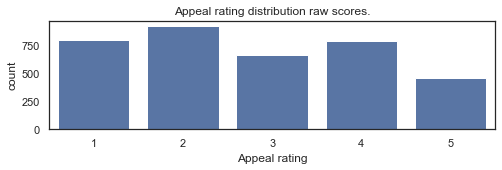

In [41]:
sns.set(rc={'figure.figsize':(8,2)})
sns.set_style("white")

ax = sns.countplot(data=dappeal, x="rating", color="b")
ax.set_xlabel("Appeal rating")
save_fig(ax, "Appeal rating distribution raw scores.", "rating_dist_appeal.pdf")

In [6]:
db_order = sorted(list(set(dr["db"].values)))
print(db_order)

['craiyon', 'dall-e', 'glide', 'midjourney', 'own', 'stable_diffusion']


In [7]:
# load objective things, NIMA

def read_json(x):
    with open(x) as xfp:
        j = json.load(xfp)
    r = []
    for c in j:
        c["db"] = os.path.basename(x).split(".")[0]
        r.append(c)
    return r

df = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_appeal/*.json"))
        ), []
    )
)

df["db"] = df["db"].apply(lambda x: x.split("_", 1)[1])
df["image_key"] =  df["db"] + "/" + df["image_id"]
df["nima_appeal"] = df["mean_score_prediction"]
df = df[["image_key", "nima_appeal"]]
d(df)

,image_key,nima_appeal
0,own/p21,5.170084
1,own/p23,5.243021
2,own/p25,5.867942
3,own/p24,5.027028
4,own/p20,5.836780
...,...,...
141,dall-e/p10,4.391277
142,dall-e/p17,4.629117
143,dall-e/p09,5.225628
144,dall-e/p26,4.689971


In [8]:
dappeal_mean = dappeal.groupby(by="image_key").mean().reset_index()
dappeal_mean = dappeal_mean[["image_key", "rating"]]
d(dappeal_mean)

/tmp/ipykernel_588162/4271648347.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dappeal_mean = dappeal.groupby(by="image_key").mean().reset_index()


,image_key,rating
0,craiyon/p01,2.600000
1,craiyon/p02,2.960000
2,craiyon/p03,2.560000
3,craiyon/p04,2.840000
4,craiyon/p05,1.880000
...,...,...
141,stable_diffusion/p23,3.200000
142,stable_diffusion/p24,3.400000
143,stable_diffusion/p25,2.840000
144,stable_diffusion/p26,3.192308


In [9]:
dappeal_std = dappeal.groupby(by="image_key").std().reset_index()[["image_key", "rating"]]
dappeal_std = dappeal_std.rename(columns={"rating": "std"})
dappeal_mean = pd.merge(dappeal_mean, dappeal_std, left_on="image_key", right_on="image_key")
d(dappeal_mean)

/tmp/ipykernel_588162/948355668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dappeal_std = dappeal.groupby(by="image_key").std().reset_index()[["image_key", "rating"]]


,image_key,rating,std
0,craiyon/p01,2.600000,1.190238
1,craiyon/p02,2.960000,1.135782
2,craiyon/p03,2.560000,1.227464
3,craiyon/p04,2.840000,1.312758
4,craiyon/p05,1.880000,1.053565
...,...,...,...
141,stable_diffusion/p23,3.200000,1.080123
142,stable_diffusion/p24,3.400000,1.443376
143,stable_diffusion/p25,2.840000,1.178983
144,stable_diffusion/p26,3.192308,1.233507


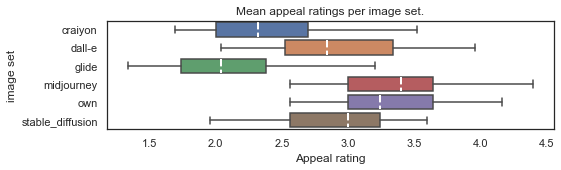

In [40]:
dappeal_mean_db = dappeal_mean.copy()
dappeal_mean_db["db"] = dappeal_mean["image_key"].apply(lambda x: x.split("/")[0])

sns.set(rc={'figure.figsize':(8,2)})
sns.set_style("white")

ax = sns.boxplot(data=dappeal_mean_db, x="rating", y="db",  order=db_order, medianprops={"color": "white", "lw":2, "linestyle":"--"})
ax.set_ylabel("image set")
ax.set_xlabel("Appeal rating")

save_fig(ax, "Mean appeal ratings per image set.", "rating_appeal_mean_per_db.pdf")

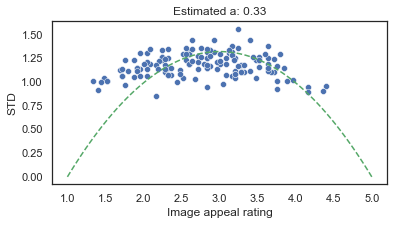

In [11]:
# draw a SOS plot
# read: http://materials.dagstuhl.de/files/15/15022/15022.TobiasHo%C3%9Ffeld1.Preprint.pdf
# for a more detailed description of SOS plots

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

ax = sns.scatterplot(x="rating", y="std", data=dappeal_mean)

#, with the y=(x-1)*(x-5)* a interpolated function 

x_data = dappeal_mean["rating"].values
y_data = dappeal_mean["std"].replace(np.NaN, 0).values

from scipy.optimize import curve_fit

def fitting_function(x, a):
    return (x - 1) * (x - 5) * (-a)

popt, pcov = curve_fit(fitting_function, x_data, y_data) 


x = np.linspace(1, 5, 100)
ax.plot(x, fitting_function(x, *popt), 'g--')
ax.set_xlabel("Image appeal rating")
ax.set_ylabel("STD")

save_fig(ax, f"Estimated a: {popt[0].round(3)}", "sos_plot_appeal.pdf")

In [12]:
ppp = dappeal_mean.sort_values(by="rating")
d(ppp.head(5))
d(ppp.tail(5))


,image_key,rating,std
64,glide/p11,1.333333,1.007220
75,glide/p22,1.400000,0.912871
80,glide/p27,1.440000,1.003328
63,glide/p10,1.480000,1.045626
70,glide/p17,1.520000,1.004988


,image_key,rating,std
41,dall-e/p15,3.96,1.019804
104,midjourney/p24,4.16,0.943398
115,own/p24,4.16,0.898146
102,midjourney/p22,4.36,0.907377
96,midjourney/p16,4.40,0.957427


In [13]:
dappeal_mean_with_prompt = dappeal_mean.copy()
dappeal_mean_with_prompt["prompt"] = dappeal_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[1])
d(dappeal_mean_with_prompt)

dp11 = dappeal_mean_with_prompt[dappeal_mean_with_prompt["prompt"] == "p11"].sort_values(by="rating")
print(list(dp11["image_key"].values))
print(list(dp11["rating"].round(2).values))

,image_key,rating,std,prompt
0,craiyon/p01,2.600000,1.190238,p01
1,craiyon/p02,2.960000,1.135782,p02
2,craiyon/p03,2.560000,1.227464,p03
3,craiyon/p04,2.840000,1.312758,p04
4,craiyon/p05,1.880000,1.053565,p05
...,...,...,...,...
141,stable_diffusion/p23,3.200000,1.080123,p23
142,stable_diffusion/p24,3.400000,1.443376,p24
143,stable_diffusion/p25,2.840000,1.178983,p25
144,stable_diffusion/p26,3.192308,1.233507,p26


['glide/p11', 'craiyon/p11', 'stable_diffusion/p11', 'dall-e/p11', 'midjourney/p11']
[1.33, 1.72, 2.0, 2.24, 2.56]


In [14]:
dp16 = dappeal_mean_with_prompt[dappeal_mean_with_prompt["prompt"] == "p16"].sort_values(by="rating")
print(list(dp16["image_key"].values))
print(list(dp16["rating"].round(2).values))

['glide/p16', 'craiyon/p16', 'stable_diffusion/p16', 'dall-e/p16', 'midjourney/p16']
[2.6, 3.16, 3.6, 3.72, 4.4]


In [15]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

,image_key,nima_appeal,rating,std,db
0,own/p21,5.170084,3.64,1.150362,own
1,own/p23,5.243021,3.16,1.280625,own
2,own/p25,5.867942,3.80,1.290994,own
3,own/p24,5.027028,4.16,0.898146,own
4,own/p20,5.836780,3.64,1.186030,own


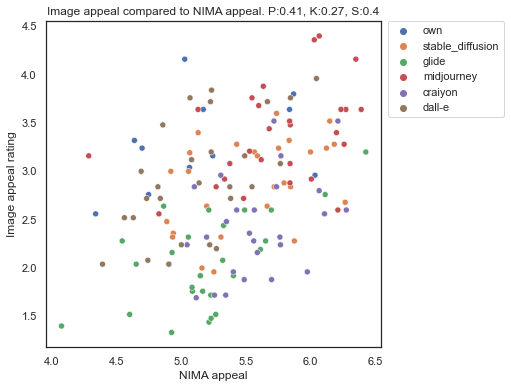

In [16]:
dm = pd.merge(df, dappeal_mean, left_on="image_key", right_on="image_key")
dm["db"] = dm["image_key"].apply(lambda x: x.split("/")[0])
d(dm.head())

ax = sns.scatterplot(x="nima_appeal", y="rating", hue="db", data=dm)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("Image appeal rating")
ax.set_xlabel("NIMA appeal")

p =  dm[["nima_appeal", "rating"]].corr().values[0,1]
s = dm[["nima_appeal", "rating"]].corr(method="spearman").values[0,1]
k = dm[["nima_appeal", "rating"]].corr(method="kendall").values[0,1]

save_fig(ax, f"Image appeal compared to NIMA appeal. P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}", "appeal_vs_nima.pdf")

In [17]:
da = df.copy()
da["metric"] = "NIMA_appeal"
da["quality_score"] = da["nima_appeal"]
da = da[["image_key", "metric", "quality_score"]]
d(da)

,image_key,metric,quality_score
0,own/p21,NIMA_appeal,5.170084
1,own/p23,NIMA_appeal,5.243021
2,own/p25,NIMA_appeal,5.867942
3,own/p24,NIMA_appeal,5.027028
4,own/p20,NIMA_appeal,5.836780
...,...,...,...
141,dall-e/p10,NIMA_appeal,4.391277
142,dall-e/p17,NIMA_appeal,4.629117
143,dall-e/p09,NIMA_appeal,5.225628
144,dall-e/p26,NIMA_appeal,4.689971


In [18]:
dq = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_quality/*.json"))
        ), []
    )
)

dq["db"] = dq["db"].apply(lambda x: x.split("_", 1)[1])
dq["image_key"] =  dq["db"] + "/" + dq["image_id"]
dq["quality_score"] = dq["mean_score_prediction"]
dq = dq[["image_key", "quality_score"]]
dq["metric"] = "NIMA_quality"
d(dq)

# read the other iqa models

di = pd.read_csv("iqa_models/iqa.csv")
di["image_key"] = di["model"] + "/" + di["img_id"].apply(lambda x: x.split(".")[0])
di = di[["image_key", "metric", "quality_score"]]
di = pd.concat([di, dq, da], ignore_index=True)

d(di)

,image_key,quality_score,metric
0,glide/p02,5.591642,NIMA_quality
1,glide/p21,5.006300,NIMA_quality
2,glide/p11,5.037328,NIMA_quality
3,glide/p23,5.607345,NIMA_quality
4,glide/p25,4.489417,NIMA_quality
...,...,...,...
141,midjourney/p10,4.791872,NIMA_quality
142,midjourney/p17,4.154626,NIMA_quality
143,midjourney/p09,4.265830,NIMA_quality
144,midjourney/p26,5.097150,NIMA_quality


,image_key,metric,quality_score
0,midjourney/p01,ILNIQE,31.687208
1,midjourney/p02,ILNIQE,21.160603
2,midjourney/p03,ILNIQE,21.166543
3,midjourney/p04,ILNIQE,27.999914
4,midjourney/p05,ILNIQE,22.605025
...,...,...,...
1163,dall-e/p10,NIMA_appeal,4.391277
1164,dall-e/p17,NIMA_appeal,4.629117
1165,dall-e/p09,NIMA_appeal,5.225628
1166,dall-e/p26,NIMA_appeal,4.689971


In [19]:
values = []
for metric, dg in di.groupby(by="metric"):
    #print(metric)
    dm = pd.merge(dg, dappeal_mean, left_on="image_key", right_on="image_key")
    #d(dm)
    
    p = dm[["quality_score", "rating"]].corr().values[0,1]
    s = dm[["quality_score", "rating"]].corr(method="spearman").values[0,1]
    k = dm[["quality_score", "rating"]].corr(method="kendall").values[0,1]
    #print(p, s, k)
    values.append({
        "metric": metric,
        "p": p,
        "k": k,
        "s": s
    })

    #break
    
dmetrics = pd.DataFrame(values).sort_values(by="p")
d(dmetrics)
print(dmetrics.round(2).to_latex(index=False))

,metric,p,k,s
7,NIQE,-0.433788,-0.295343,-0.431042
2,ILNIQE,-0.349127,-0.211721,-0.311799
0,BRISQUE,-0.331320,-0.193435,-0.284445
6,NIMA_quality,-0.069007,-0.047335,-0.067271
1,DBCNN,0.105471,0.086955,0.134493
4,MUSIQ,0.174001,0.128861,0.201687
3,MANIQA,0.334522,0.256485,0.388938
5,NIMA_appeal,0.413228,0.271914,0.399451


\begin{tabular}{lrrr}
\toprule
      metric &     p &     k &     s \\
\midrule
        NIQE & -0.43 & -0.30 & -0.43 \\
      ILNIQE & -0.35 & -0.21 & -0.31 \\
     BRISQUE & -0.33 & -0.19 & -0.28 \\
NIMA\_quality & -0.07 & -0.05 & -0.07 \\
       DBCNN &  0.11 &  0.09 &  0.13 \\
       MUSIQ &  0.17 &  0.13 &  0.20 \\
      MANIQA &  0.33 &  0.26 &  0.39 \\
 NIMA\_appeal &  0.41 &  0.27 &  0.40 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_588162/1334881053.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dmetrics.round(2).to_latex(index=False))


# comparison with other appeal ratings

In [20]:
ddb = pd.read_csv("all_ratings.csv")
d(ddb)

,image_key,db,appeal_mean,appeal_std,realism_mean,prompt_matching_mean
0,craiyon/p01,craiyon,2.636364,1.292670,2.045455,4.727273
1,craiyon/p02,craiyon,2.818182,1.139606,2.772727,4.818182
2,craiyon/p03,craiyon,2.636364,1.216766,1.909091,4.681818
3,craiyon/p04,craiyon,3.000000,1.309307,3.181818,3.181818
4,craiyon/p05,craiyon,2.227273,1.020356,1.863636,4.590909
...,...,...,...,...,...,...
141,stable_diffusion/p23,stable_diffusion,3.272727,1.351606,3.727273,3.636364
142,stable_diffusion/p24,stable_diffusion,3.681818,1.041353,3.772727,4.636364
143,stable_diffusion/p25,stable_diffusion,2.714286,1.346954,3.095238,4.190476
144,stable_diffusion/p26,stable_diffusion,3.318182,1.249242,2.772727,4.727273


,image_key,appeal_mean,appeal_std,db,appeal_mean_db,appeal_std_db,realism_mean,prompt_matching_mean
0,craiyon/p01,2.600000,1.190238,craiyon,2.636364,1.292670,2.045455,4.727273
1,craiyon/p02,2.960000,1.135782,craiyon,2.818182,1.139606,2.772727,4.818182
2,craiyon/p03,2.560000,1.227464,craiyon,2.636364,1.216766,1.909091,4.681818
3,craiyon/p04,2.840000,1.312758,craiyon,3.000000,1.309307,3.181818,3.181818
4,craiyon/p05,1.880000,1.053565,craiyon,2.227273,1.020356,1.863636,4.590909
...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23,3.200000,1.080123,stable_diffusion,3.272727,1.351606,3.727273,3.636364
142,stable_diffusion/p24,3.400000,1.443376,stable_diffusion,3.681818,1.041353,3.772727,4.636364
143,stable_diffusion/p25,2.840000,1.178983,stable_diffusion,2.714286,1.346954,3.095238,4.190476
144,stable_diffusion/p26,3.192308,1.233507,stable_diffusion,3.318182,1.249242,2.772727,4.727273


P:0.91, K:0.75, S:0.9


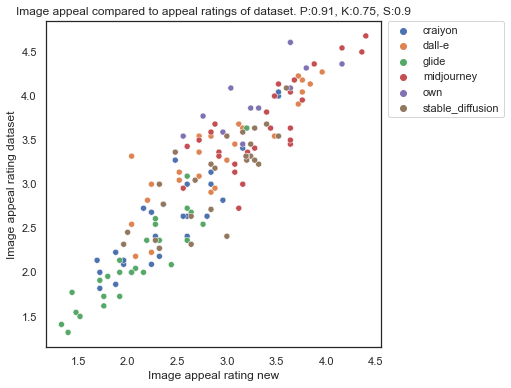

In [21]:
dtmp = dappeal_mean.copy()
dtmp["appeal_mean"] = dtmp["rating"]
dtmp["appeal_std"] = dtmp["std"]
dtmp = dtmp[["image_key", "appeal_mean", "appeal_std"]]

dcmp = pd.merge(
    dtmp,
    ddb,
    left_on="image_key",
    right_on="image_key",
    suffixes=("", "_db")
)
d(dcmp)
ax = sns.scatterplot(
    x="appeal_mean",
    y="appeal_mean_db",
    hue="db",
    data=dcmp
)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("Image appeal rating dataset")
ax.set_xlabel("Image appeal rating new")

p = dcmp[["appeal_mean", "appeal_mean_db"]].corr().values[0,1]
s = dcmp[["appeal_mean", "appeal_mean_db"]].corr(method="spearman").values[0,1]
k = dcmp[["appeal_mean", "appeal_mean_db"]].corr(method="kendall").values[0,1]

save_fig(ax, f"Image appeal compared to appeal ratings of dataset. P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}", "appeal_vs_appeal_db.pdf")
print(f"P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}")


In [22]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

# checkout quality

In [23]:
d(dquality)
dquality_mean = dquality.groupby(by="image_key").mean().reset_index()
dquality_mean = dquality_mean[["image_key", "rating"]]
d(dquality_mean)

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
3,1,116,./stimuli/own/p25.png,range_image_quality,3,2023-02-13 15:30:07 575841,True,True,own,own/p25
11,1,85,./stimuli/midjourney/p05.png,range_image_quality,4,2023-02-13 15:30:18 311419,True,True,midjourney,midjourney/p05
19,1,52,./stimuli/dall-e/p26.png,range_image_quality,3,2023-02-13 15:30:25 821821,True,True,dall-e,dall-e/p26
27,1,81,./stimuli/midjourney/p01.png,range_image_quality,4,2023-02-13 15:30:35 101121,True,True,midjourney,midjourney/p01
35,1,42,./stimuli/dall-e/p16.png,range_image_quality,5,2023-02-13 15:30:44 064676,True,True,dall-e,dall-e/p16
...,...,...,...,...,...,...,...,...,...,...
29464,62,3,./stimuli/craiyon/p04.png,range_image_quality,2,2023-02-16 09:24:10 411412,True,True,craiyon,craiyon/p04
29472,62,108,./stimuli/own/p17.png,range_image_quality,4,2023-02-16 09:24:14 860524,True,True,own,own/p17
29480,62,97,./stimuli/midjourney/p17.png,range_image_quality,2,2023-02-16 09:24:18 833662,True,True,midjourney,midjourney/p17
29488,62,107,./stimuli/midjourney/p27.png,range_image_quality,2,2023-02-16 09:24:22 635474,True,True,midjourney,midjourney/p27


/tmp/ipykernel_588162/936547445.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dquality_mean = dquality.groupby(by="image_key").mean().reset_index()


,image_key,rating
0,craiyon/p01,2.280000
1,craiyon/p02,2.600000
2,craiyon/p03,2.240000
3,craiyon/p04,2.440000
4,craiyon/p05,1.880000
...,...,...
141,stable_diffusion/p23,3.640000
142,stable_diffusion/p24,3.760000
143,stable_diffusion/p25,2.840000
144,stable_diffusion/p26,3.615385


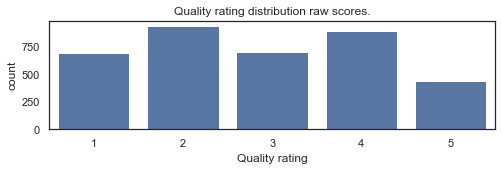

In [42]:
sns.set(rc={'figure.figsize':(8,2)})
sns.set_style("white")

ax = sns.countplot(data=dquality, x="rating", color="b")
ax.set_xlabel("Quality rating")
save_fig(ax, "Quality rating distribution raw scores.", "rating_dist_quality.pdf")

In [25]:
dquality_std = dquality.groupby(by="image_key").std().reset_index()[["image_key", "rating"]]
dquality_std = dquality_std.rename(columns={"rating": "std"})
dquality_mean = pd.merge(dquality_mean, dquality_std, left_on="image_key", right_on="image_key")
d(dquality_mean)

/tmp/ipykernel_588162/1001478179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dquality_std = dquality.groupby(by="image_key").std().reset_index()[["image_key", "rating"]]


,image_key,rating,std
0,craiyon/p01,2.280000,0.979796
1,craiyon/p02,2.600000,0.816497
2,craiyon/p03,2.240000,0.830662
3,craiyon/p04,2.440000,1.121011
4,craiyon/p05,1.880000,0.881287
...,...,...,...
141,stable_diffusion/p23,3.640000,1.075484
142,stable_diffusion/p24,3.760000,0.969536
143,stable_diffusion/p25,2.840000,1.106044
144,stable_diffusion/p26,3.615385,1.134087


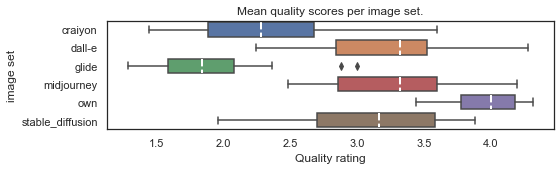

In [38]:
sns.set(rc={'figure.figsize':(8,2)})
sns.set_style("white")

dquality_mean_db = dquality_mean.copy()
dquality_mean_db["db"] = dquality_mean_db["image_key"].apply(lambda x: x.split("/")[0])
ax = sns.boxplot(data=dquality_mean_db, x="rating", y="db",  order=db_order, medianprops={"color": "white", "lw":2, "linestyle":"--"})
ax.set_ylabel("image set")
ax.set_xlabel("Quality rating")

save_fig(ax, "Mean quality scores per image set.", "rating_quality_mean_per_db.pdf")


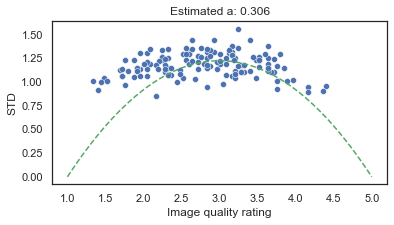

In [27]:
# draw a SOS plot
# read: http://materials.dagstuhl.de/files/15/15022/15022.TobiasHo%C3%9Ffeld1.Preprint.pdf
# for a more detailed description of SOS plots

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")


ax = sns.scatterplot(x="rating", y="std", data=dappeal_mean)

#, with the y=(x-1)*(x-5)* a interpolated function 

x_data = dquality_mean["rating"].values
y_data = dquality_mean["std"].replace(np.NaN, 0).values

from scipy.optimize import curve_fit

def fitting_function(x, a):
    return (x - 1) * (x - 5) * (-a)

popt, pcov = curve_fit(fitting_function, x_data, y_data) 


x = np.linspace(1, 5, 100)
ax.plot(x, fitting_function(x, *popt), 'g--')
ax.set_xlabel("Image quality rating")
ax.set_ylabel("STD")

save_fig(ax, f"Estimated a: {popt[0].round(3)}", "sos_plot_quality.pdf")

In [28]:
ppp = dquality_mean.sort_values(by="rating")
d(ppp.head(2))
d(ppp.tail(2))

dquality_mean_with_prompt = dquality_mean.copy()
dquality_mean_with_prompt["prompt"] = dquality_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[1])
d(dquality_mean_with_prompt)

,image_key,rating,std
80,glide/p27,1.28,0.678233
59,glide/p06,1.36,0.860233


,image_key,rating,std
49,dall-e/p23,4.28,0.842615
111,own/p20,4.32,0.945163


,image_key,rating,std,prompt
0,craiyon/p01,2.280000,0.979796,p01
1,craiyon/p02,2.600000,0.816497,p02
2,craiyon/p03,2.240000,0.830662,p03
3,craiyon/p04,2.440000,1.121011,p04
4,craiyon/p05,1.880000,0.881287,p05
...,...,...,...,...
141,stable_diffusion/p23,3.640000,1.075484,p23
142,stable_diffusion/p24,3.760000,0.969536,p24
143,stable_diffusion/p25,2.840000,1.106044,p25
144,stable_diffusion/p26,3.615385,1.134087,p26


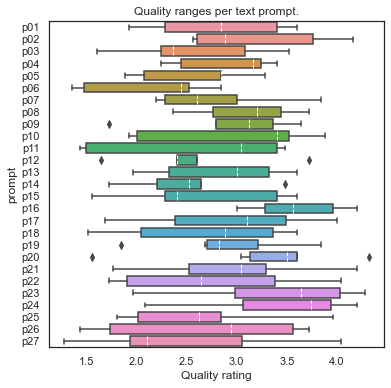

In [29]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")


dquality_mean_with_prompt_db = dquality_mean_with_prompt.copy()
dquality_mean_with_prompt_db["db"] = dquality_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[0])
ax = sns.boxplot(x="rating", y="prompt",  data=dquality_mean_with_prompt_db, medianprops={"color": "white", "lw":1, "linestyle":"--"})
ax.set_xlabel("Quality rating")
save_fig(ax, "Quality ranges per text prompt.", "rating_quality_mean_per_rext_prompt.pdf")


In [30]:
dquality_mean_with_prompt_db.groupby(by="prompt").mean().reset_index().sort_values(by="rating")

/tmp/ipykernel_588162/640177047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dquality_mean_with_prompt_db.groupby(by="prompt").mean().reset_index().sort_values(by="rating")


,prompt,rating,std
5,p06,2.128000,1.032650
26,p27,2.460000,0.988472
13,p14,2.512000,1.146931
11,p12,2.552000,1.042916
2,p03,2.560000,0.987033
10,p11,2.572000,1.091746
4,p05,2.583385,1.025405
24,p25,2.620000,1.021749
14,p15,2.648000,1.055555
25,p26,2.689231,0.998522


In [31]:
dp23 = dquality_mean_with_prompt[dquality_mean_with_prompt["prompt"] == "p23"].sort_values(by="rating")
print(list(dp23["image_key"].values))
print(list(dp23["rating"].round(2).values))

['glide/p23', 'craiyon/p23', 'midjourney/p23', 'stable_diffusion/p23', 'own/p23', 'dall-e/p23']
[1.96, 2.76, 3.64, 3.64, 4.16, 4.28]


In [32]:
dp27 = dquality_mean_with_prompt[dquality_mean_with_prompt["prompt"] == "p27"].sort_values(by="rating")
print(list(dp27["image_key"].values))
print(list(dp27["rating"].round(2).values))

['glide/p27', 'craiyon/p27', 'stable_diffusion/p27', 'dall-e/p27', 'midjourney/p27', 'own/p27']
[1.28, 1.92, 1.96, 2.24, 3.32, 4.04]


In [33]:
values = []
for metric, dg in di.groupby(by="metric"):
    #print(metric)
    dm = pd.merge(dg, dquality_mean, left_on="image_key", right_on="image_key")
    #d(dm)
    
    p = dm[["quality_score", "rating"]].corr().values[0,1]
    s = dm[["quality_score", "rating"]].corr(method="spearman").values[0,1]
    k = dm[["quality_score", "rating"]].corr(method="kendall").values[0,1]
    #print(p, s, k)
    values.append({
        "metric": metric,
        "p": p,
        "k": k,
        "s": s
    })

    #break
    
dmetrics = pd.DataFrame(values).sort_values(by="p")
d(dmetrics)
print("quality vs objective metrics")
print(dmetrics.round(2).to_latex(index=False))

,metric,p,k,s
0,BRISQUE,-0.391052,-0.263927,-0.379874
7,NIQE,-0.367640,-0.246795,-0.368960
2,ILNIQE,-0.316467,-0.204917,-0.303407
6,NIMA_quality,0.034637,0.025983,0.029320
5,NIMA_appeal,0.114768,0.074333,0.097911
1,DBCNN,0.161317,0.122493,0.182287
4,MUSIQ,0.261838,0.182455,0.282810
3,MANIQA,0.444466,0.328266,0.489245


quality vs objective metrics
\begin{tabular}{lrrr}
\toprule
      metric &     p &     k &     s \\
\midrule
     BRISQUE & -0.39 & -0.26 & -0.38 \\
        NIQE & -0.37 & -0.25 & -0.37 \\
      ILNIQE & -0.32 & -0.20 & -0.30 \\
NIMA\_quality &  0.03 &  0.03 &  0.03 \\
 NIMA\_appeal &  0.11 &  0.07 &  0.10 \\
       DBCNN &  0.16 &  0.12 &  0.18 \\
       MUSIQ &  0.26 &  0.18 &  0.28 \\
      MANIQA &  0.44 &  0.33 &  0.49 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_588162/3256944963.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dmetrics.round(2).to_latex(index=False))


In [34]:
d(df)

,image_key,nima_appeal
0,own/p21,5.170084
1,own/p23,5.243021
2,own/p25,5.867942
3,own/p24,5.027028
4,own/p20,5.836780
...,...,...
141,dall-e/p10,4.391277
142,dall-e/p17,4.629117
143,dall-e/p09,5.225628
144,dall-e/p26,4.689971


,image_key,nima_quality,rating,std,db
0,glide/p02,5.591642,2.88,0.971253,glide
1,glide/p21,5.006300,1.76,1.011599,glide
2,glide/p11,5.037328,1.50,0.932505,glide
3,glide/p23,5.607345,1.96,0.888819,glide
4,glide/p25,4.489417,1.80,0.912871,glide


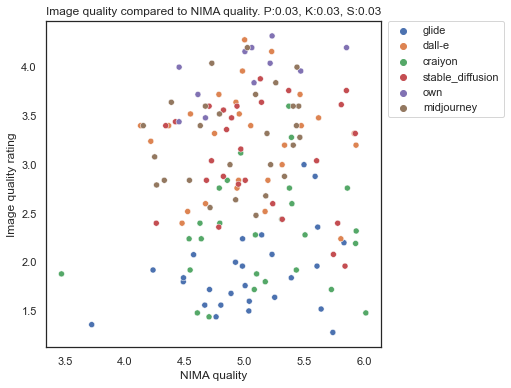

In [35]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

dqnima = dq[["image_key", "quality_score"]].copy()
dqnima = dqnima.rename(columns={"quality_score": "nima_quality"})

dm = pd.merge(dqnima, dquality_mean, left_on="image_key", right_on="image_key")
dm["db"] = dm["image_key"].apply(lambda x: x.split("/")[0])
d(dm.head())

ax = sns.scatterplot(x="nima_quality", y="rating", hue="db", data=dm)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("Image quality rating")
ax.set_xlabel("NIMA quality")

p =  dm[["nima_quality", "rating"]].corr().values[0,1]
s = dm[["nima_quality", "rating"]].corr(method="spearman").values[0,1]
k = dm[["nima_quality", "rating"]].corr(method="kendall").values[0,1]

save_fig(ax, f"Image quality compared to NIMA quality. P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}", "quality_vs_nima.pdf")

# compare appeal and quality

,image_key,rating,std
0,craiyon/p01,2.600000,1.190238
1,craiyon/p02,2.960000,1.135782
2,craiyon/p03,2.560000,1.227464
3,craiyon/p04,2.840000,1.312758
4,craiyon/p05,1.880000,1.053565
...,...,...,...
141,stable_diffusion/p23,3.200000,1.080123
142,stable_diffusion/p24,3.400000,1.443376
143,stable_diffusion/p25,2.840000,1.178983
144,stable_diffusion/p26,3.192308,1.233507


,image_key,rating,std
0,craiyon/p01,2.280000,0.979796
1,craiyon/p02,2.600000,0.816497
2,craiyon/p03,2.240000,0.830662
3,craiyon/p04,2.440000,1.121011
4,craiyon/p05,1.880000,0.881287
...,...,...,...
141,stable_diffusion/p23,3.640000,1.075484
142,stable_diffusion/p24,3.760000,0.969536
143,stable_diffusion/p25,2.840000,1.106044
144,stable_diffusion/p26,3.615385,1.134087


P:0.8, K:0.62, S:0.8


,image_key,rating_appeal,std_appeal,rating_quality,std_quality,db
0,craiyon/p01,2.600000,1.190238,2.280000,0.979796,craiyon
1,craiyon/p02,2.960000,1.135782,2.600000,0.816497,craiyon
2,craiyon/p03,2.560000,1.227464,2.240000,0.830662,craiyon
3,craiyon/p04,2.840000,1.312758,2.440000,1.121011,craiyon
4,craiyon/p05,1.880000,1.053565,1.880000,0.881287,craiyon
...,...,...,...,...,...,...
141,stable_diffusion/p23,3.200000,1.080123,3.640000,1.075484,stable_diffusion
142,stable_diffusion/p24,3.400000,1.443376,3.760000,0.969536,stable_diffusion
143,stable_diffusion/p25,2.840000,1.178983,2.840000,1.106044,stable_diffusion
144,stable_diffusion/p26,3.192308,1.233507,3.615385,1.134087,stable_diffusion


<Axes: xlabel='rating_appeal', ylabel='rating_quality'>

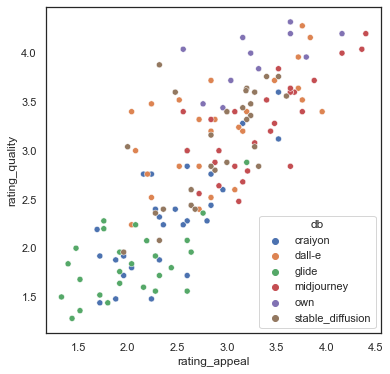

In [36]:

d(dappeal_mean)
d(dquality_mean)
darm = pd.merge(
    dappeal_mean, 
    dquality_mean, 
    left_on="image_key", 
    right_on="image_key",
    suffixes=("_appeal", "_quality")
)
darm["db"] = darm["image_key"].apply(
    lambda x:
        x.split("/")[0]
)

p = darm[["rating_appeal", "rating_quality"]].corr().values[0,1]
s = darm[["rating_appeal", "rating_quality"]].corr(method="spearman").values[0,1]
k = darm[["rating_appeal", "rating_quality"]].corr(method="kendall").values[0,1]
print(f"P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}")

d(darm)
sns.scatterplot(data=darm, x="rating_appeal", y="rating_quality", hue="db")

,db,p,k,s,mean_appeal,mean_quality
0,craiyon,0.771890,0.524927,0.700613,2.416752,2.287123
1,dall-e,0.630414,0.447718,0.594665,2.934815,3.244444
2,glide,0.573102,0.339143,0.472469,2.062431,1.890997
3,midjourney,0.742161,0.542274,0.703369,3.370679,3.279691
4,own,0.584083,0.425926,0.573059,3.298182,3.941818
5,stable_diffusion,0.622557,0.472466,0.573853,2.884160,3.083533
6,overall,0.801341,0.617924,0.796639,2.776292,2.846413


/tmp/ipykernel_588162/2924293145.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dar.sort_values(by="p").round(2).to_latex(index=False))


\begin{tabular}{lrrrrr}
\toprule
              db &    p &    k &    s &  mean\_appeal &  mean\_quality \\
\midrule
           glide & 0.57 & 0.34 & 0.47 &         2.06 &          1.89 \\
             own & 0.58 & 0.43 & 0.57 &         3.30 &          3.94 \\
stable\_diffusion & 0.62 & 0.47 & 0.57 &         2.88 &          3.08 \\
          dall-e & 0.63 & 0.45 & 0.59 &         2.93 &          3.24 \\
      midjourney & 0.74 & 0.54 & 0.70 &         3.37 &          3.28 \\
         craiyon & 0.77 & 0.52 & 0.70 &         2.42 &          2.29 \\
         overall & 0.80 & 0.62 & 0.80 &         2.78 &          2.85 \\
\bottomrule
\end{tabular}



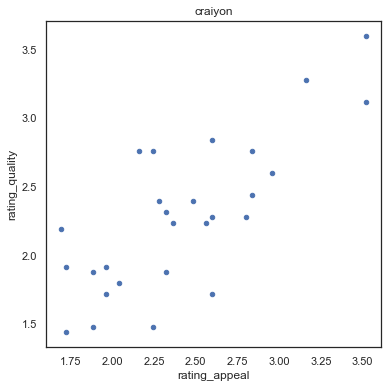

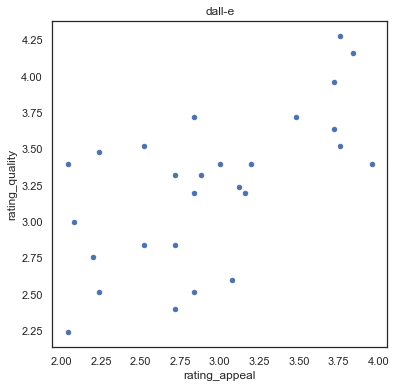

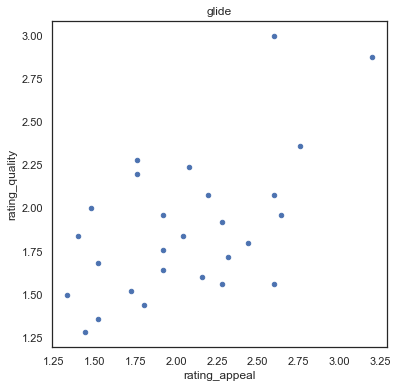

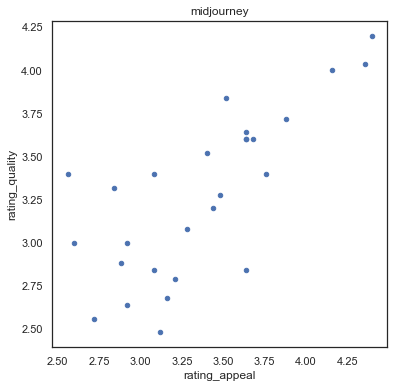

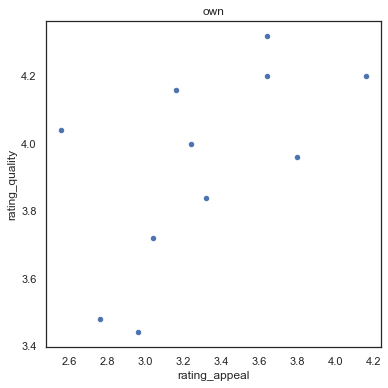

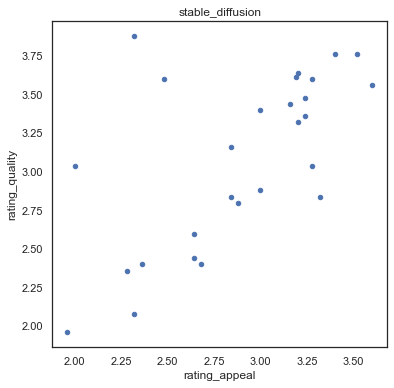

In [37]:
ar_values = []   # appeal quality correlations

for x, dd in darm.groupby(by="db"):
    ax = dd.plot(x="rating_appeal", y="rating_quality", kind="scatter")
    ax.set_title(x)
    ar_values.append({
            "db": x,
            "p": dd[["rating_appeal", "rating_quality"]].corr().values[0,1],
            "k": dd[["rating_appeal", "rating_quality"]].corr(method="kendall").values[0,1],
            "s": dd[["rating_appeal", "rating_quality"]].corr(method="spearman").values[0,1],
            "mean_appeal": dd["rating_appeal"].mean(),
            "mean_quality": dd["rating_quality"].mean()
        }
    )
    
ar_values.append({
        "db": "overall",
        "p": darm[["rating_appeal", "rating_quality"]].corr().values[0,1],
        "k": darm[["rating_appeal", "rating_quality"]].corr(method="kendall").values[0,1],
        "s": darm[["rating_appeal", "rating_quality"]].corr(method="spearman").values[0,1],
        "mean_appeal": darm["rating_appeal"].mean(),
        "mean_quality": darm["rating_quality"].mean()
    }
)
dar = pd.DataFrame(ar_values)
d(dar)
print(dar.sort_values(by="p").round(2).to_latex(index=False))